In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA


In [9]:
data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [12]:
data_norm = normalize(data)
data_norm = pd.DataFrame(data_norm, columns=data.columns)

In [13]:
data_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel           440 non-null    float64
 1   Region            440 non-null    float64
 2   Fresh             440 non-null    float64
 3   Milk              440 non-null    float64
 4   Grocery           440 non-null    float64
 5   Frozen            440 non-null    float64
 6   Detergents_Paper  440 non-null    float64
 7   Delicassen        440 non-null    float64
dtypes: float64(8)
memory usage: 27.6 KB


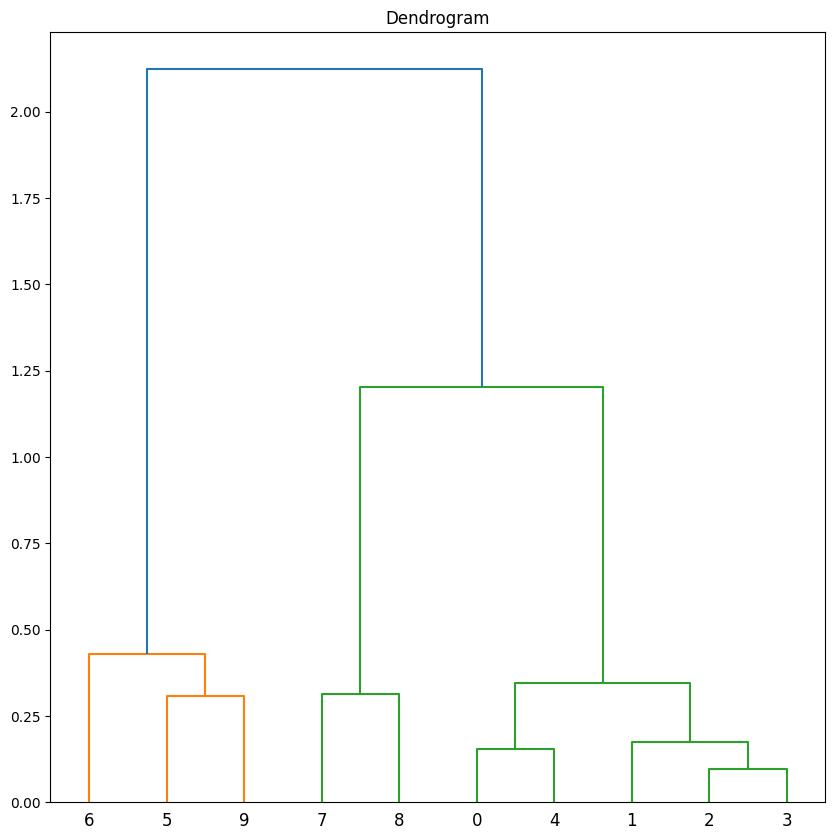

In [18]:
##dendogram
subset_data = data_norm.sample(n=10)
plt.figure(figsize=(10,10))
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(subset_data,method='ward'))


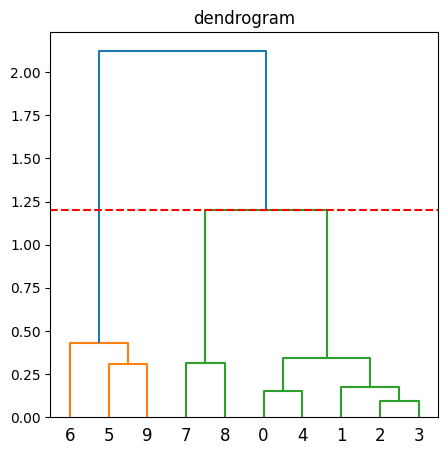

In [19]:
plt.figure(figsize=(5,5))
plt.title('dendrogram')
dend = shc.dendrogram(shc.linkage(subset_data,method='ward'))
plt.axhline(y=1.2, color='r', linestyle ='--')

In [22]:
pca  = PCA(n_components = 2)
reduced_data = pca.fit_transform(data_norm)

In [25]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
now = cluster.fit_predict(reduced_data)

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x-reduced_data[:,0],y=reduced_data[:,1],c=cluster.labels_,cmap='rainbow')
plt.title('scatter plot of wholesale data')


In [26]:
from sklearn.cluster import AgglomerativeClustering
import inspect

print(inspect.signature(AgglomerativeClustering))

(n_clusters=2, *, metric='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)
